In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from numpy import pi
from mpmath.calculus.optimization import findroot
import numpy as np
from sympy import erfc, exp
from mpmath import *
import deloc as dl
from tkinter import *

An example for a Fabry-Perot microcavity system with disorder. Cavity and molecular parameters are given below.
 $m$: Cavity band order
 $E_0$: Mean molecular transition energy
 $\Delta$: Half of the Rabi Splitting
 $L_c$: Cavity Length
 $q$: wave-vector number
 $E_c$: Cavity cut-off energy
 $\sigma$: Molecular energetic disorder
 $\Gamma_{M}$ = Dynamic disorder
 $\Gamma_L$ = Cavity leakage rate
 $a$: Average intermolecular distance

q_domain needs to be specified for domain of wave number space.


In [2]:
# Constants for calculations
# meV for energies
# cm for lengths

q_initial = 1e-5

q_final = 1e5

q_step = 1e3

m = 1

Ec = 1e3

E0 = 1e3

Lc = 1e-4

Delta = 30

Sigma = 20

Gamma_Ex = 10

Gamma_L = 10

a = 1e-6

q_domain = np.arange(q_initial, q_final, q_step)

Cavity dispersion can be plotted for discrete energy bands, with integer m-orders. In this example, the molecular transition energies are near resonant with the first cavity band.

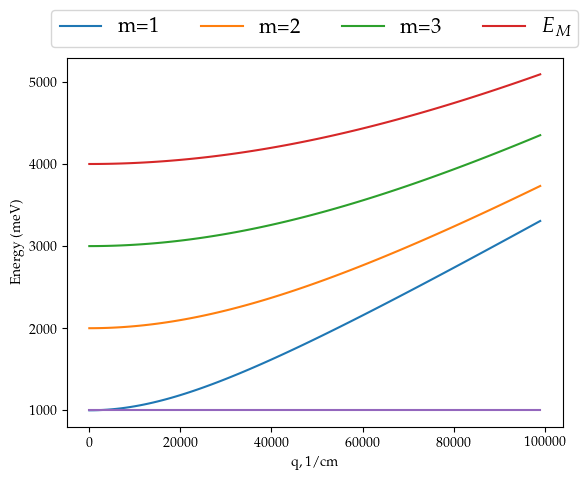

In [3]:
# plot cavity dispersions for different orders
plt.plot(q_domain, dl.energy_cavity(1, q_domain, Ec, Lc))
plt.plot(q_domain, dl.energy_cavity(2, q_domain, 2*Ec, Lc))
plt.plot(q_domain, dl.energy_cavity(3, q_domain, 3*Ec, Lc))
plt.plot(q_domain, dl.energy_cavity(4, q_domain, 4*Ec, Lc))
# show average molecular transition energy on the plot

plt.plot(q_domain, np.full(len(q_domain), E0))

plt.xlabel('q, 1/cm')
plt.ylabel('Energy (meV)')
plt.legend(['m=1', "m=2", "m=3",r"$E_M$"], bbox_to_anchor=(0, 1, 1, 0),
loc="lower center", fontsize = 15, ncol = 4)
plt.show()

We will calculate boundary points for each scattering mechanism. First, starting with delocalization boundary points due to inelastic scattering of polaritons which will be an effective mechanism for this system.

In [4]:
# Define boundary points due to inelastic scattering
# Call the function calculating inelastic boundaries

q_inel_lp_min, q_inel_lp_max, q_inel_up_min = dl.inelastic(m, Ec, E0, Lc, Delta, Gamma_Ex, Gamma_L, q_initial, q_final, q_step)

print("q_inel_lp_min:", q_inel_lp_min)
print("q_inel_lp_max:", q_inel_lp_max)
print("q_inel_up_min:", q_inel_up_min)
print("No upper boundary for UP")

q_inel_lp_min: 6000.00001
q_inel_lp_max: 18000.00001
q_inel_up_min: 5000.00001
No upper boundary for UP


Now, we will calculate the boundaries due to the fluctuations, which are usually irrelevant like in this case but they can be relevant depending on the system size.

In [5]:
# Define boundary points due to fluctuations
# Call the function calculating fluctuation boundaries

q_fluc_lp_min, q_fluc_lp_max, q_fluc_up_min = dl.fluctuation(m, Ec, E0, Lc, Delta, a, q_initial, q_final, q_step)

print("q_fluc_lp_min:", q_fluc_lp_min)
print("q_fluc_lp_max:", q_fluc_lp_max)
print("q_fluc_up_min:", q_fluc_up_min)
print("No upper boundary for UP")

q_fluc_lp_min: 1000.00001
q_fluc_lp_max: 100000.0
q_fluc_up_min: 1000.00001
No upper boundary for UP


Lastly, we can calculate boundary points due to resonant scattering. Then, we will compare all boundary points to obtain final boundary points.

In [6]:
# Define boundary points due to resonant scattering
# Call the function calculating resonant boundaries

q_res_lp_min, q_res_lp_max, q_res_up_min = dl.resonant(m, Ec, E0, Lc, Delta, Sigma, q_initial, q_final, q_step)

print("q_res_lp_min:", q_res_lp_min)
print("q_res_lp_max:", q_res_lp_max)
print("q_res_up_min:", q_res_up_min)
print("No upper boundary for UP")

q_res_lp_min: 3000.00001
q_res_lp_max: 15000.00001
q_res_up_min: 2000.00001
No upper boundary for UP


In [7]:
# Define boundary points
# Call the function calculating the boundaries

q_min_lp, q_max_lp, q_min_up = dl.boundary(q_initial, q_final, q_step, m, E0, Ec, Lc, Delta, Sigma, Gamma_Ex, Gamma_L, a)

print("q_min_lp:", q_min_lp)
print("q_max_lp:", q_max_lp)
print("q_min_up:", q_min_up)
print("No upper boundary for UP")

q_min_lp: 6000.00001
q_max_lp: 15000.00001
q_min_up: 5000.00001
No upper boundary for UP


Dispersion plot including polaritonic branches with delocalization boundary points. Solid lines show delocalized polariton states. The bottom plot shows the photonic content of lower and upper polariton states.

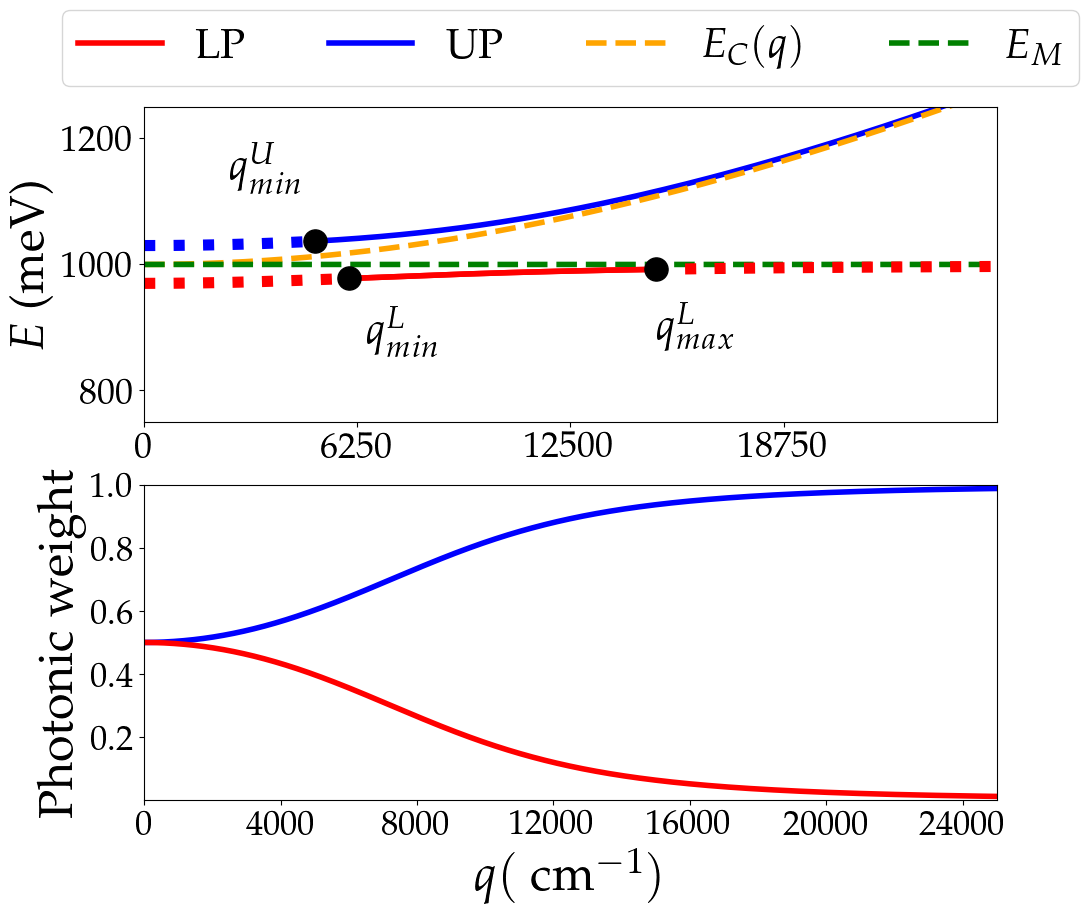

In [8]:
# Call the function to plot dispersion with boundaries
dl.plot_dispersion(q_initial, q_final, q_step, m, E0, Ec, Lc, Delta, Sigma, Gamma_Ex, Gamma_L, a)

With varying detuning $u = E_c - E_0$, wave number vs detuning phase diagrams can be plotted. The region between $q_{min}$ and $q_{max}$ points denotes delocalized modes. With zero energetic disorder $\sigma = 0$, inelastic scattering would be determining factor for localization.

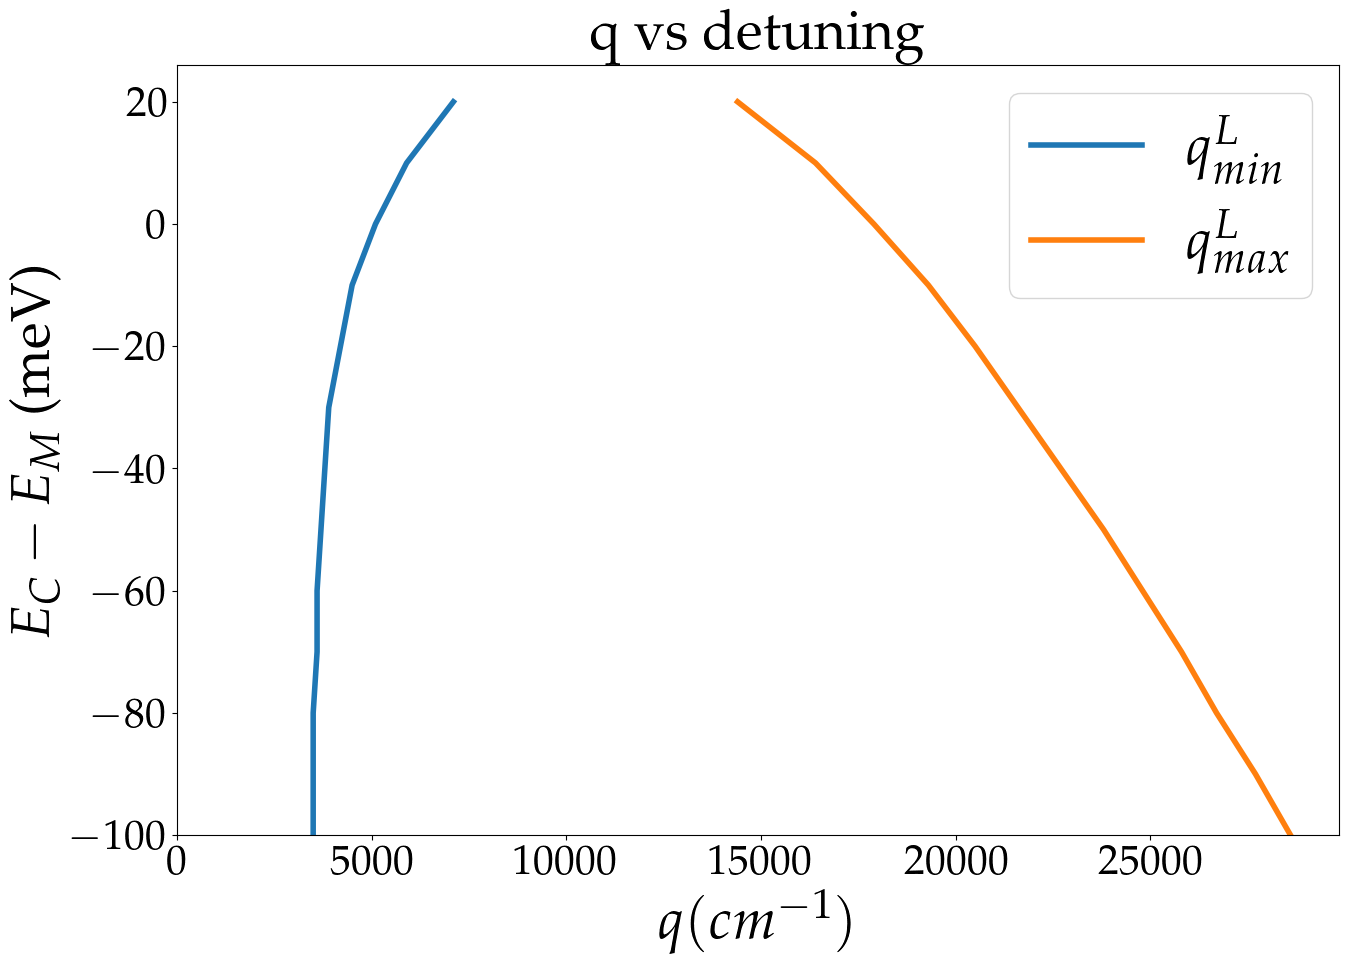

In [9]:
# Call the function to plot phase diagram determined by inelastic scattering

dl.plot_q_vs_detuning_inel(q_initial, q_final, 1e2, Ec-100, Ec+30, 10, m, E0, Lc, Delta, Gamma_Ex, Gamma_L)

With varying detuning $u = E_c - E_0$, wave number vs detuning phase diagrams can be plotted. The function to plot phase diagrams take initial and final $E_c$ values to vary detuning with given $E_c$ step size.

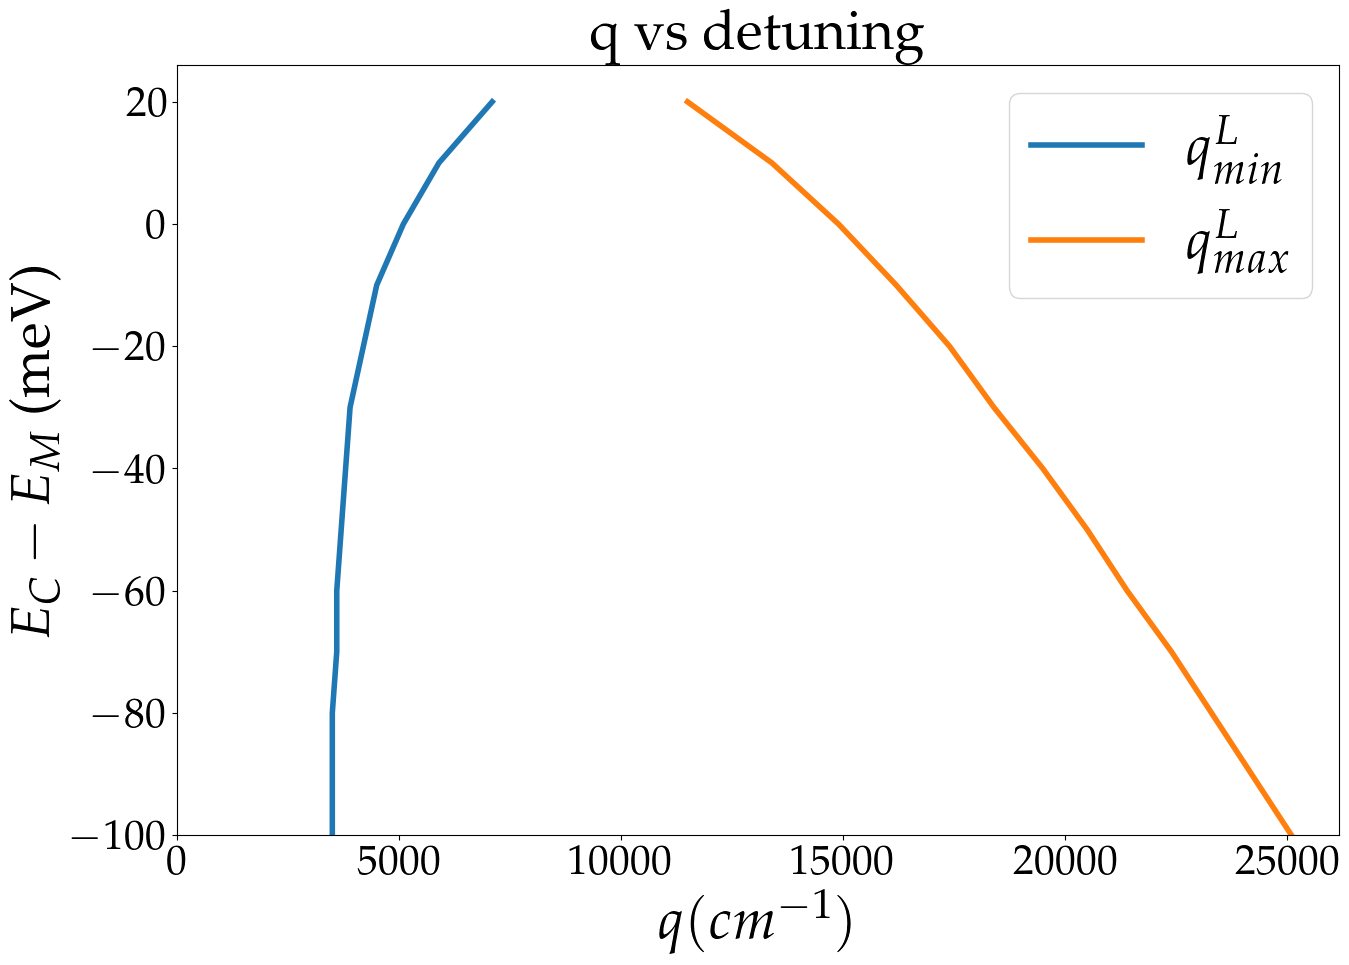

In [10]:
# Call the function to plot phase diagram
# Enter the values for varying E_c
dl.plot_q_vs_detuning(q_initial, q_final, 1e2, Ec-100, Ec+30, 10, m, E0, Lc, Delta, Sigma, Gamma_Ex, Gamma_L, a)